In [4]:
%matplotlib inline

In [5]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

In [7]:
city_data_to_load_df = pd.read_csv(city_data_to_load)
ride_data_to_load_df = pd.read_csv(ride_data_to_load)



In [8]:
combined_ct_data = pd.merge(ride_data_to_load_df,city_data_to_load_df, on="city")

combined_ct_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


# Bubble Plot of Ride Sharing Data

Obtain the x and y coordinates for each of the three city types

Build the scatter plots for each city types

Incorporate the other graph properties

Create a legend

Incorporate a text label regarding circle size

Save Figure

In [9]:
urb_city_type = combined_ct_data[combined_ct_data["type"] == "Urban"].groupby([combined_ct_data["city"]])
rur_city_type = combined_ct_data[combined_ct_data["type"] == "Rural"].groupby([combined_ct_data["city"]])
sub_city_type = combined_ct_data[combined_ct_data["type"] == "Suburban"].groupby([combined_ct_data["city"]])


#urban ride,fare,drive calculation for x

urban_ride = urb_city_type ["ride_id"].count()
urban_fare = urb_city_type ["fare"].mean()
urban_driver_count = urb_city_type["driver_count"].mean()

#Rural
rural_ride = rur_city_type ["ride_id"].count()
rural_fare = rur_city_type ["fare"].mean()
rural_driver_count = rur_city_type ["driver_count"].mean()

#Suburb

suburban_ride = sub_city_type ["ride_id"].count()
suburban_fare = sub_city_type ["fare"].mean()
suburban_driver_count = sub_city_type["driver_count"].mean()





<function matplotlib.pyplot.show(*args, **kw)>

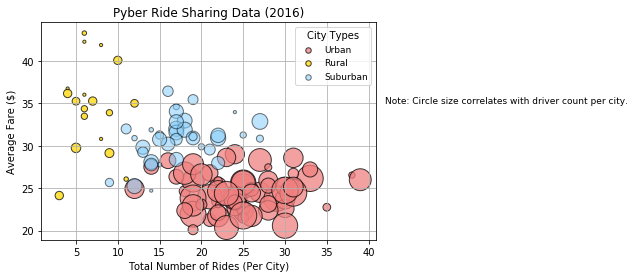

In [15]:
plt.scatter(urban_ride, urban_fare, label ="Urban", s=urban_driver_count * 10 , color="lightcoral", edgecolor="black",alpha=0.75, marker="o")
plt.scatter(rural_ride, rural_fare, label="Rural", s=rural_driver_count * 10 , color="gold", edgecolor="black", alpha=0.75, marker="o")
plt.scatter(suburban_ride, suburban_fare, label="Suburban", s=suburban_driver_count * 10 , color="lightskyblue",edgecolor="black", alpha=0.55, marker="o")

plt.grid()


plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

legend = plt.legend(fontsize = 9, title= "City Types", loc="best")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]
plt.text(42,35,"Note: Circle size correlates with driver count per city.", fontsize= 9)
plt.savefig("PyberRideData.png")
plt.show

# Total Fares by City Type

 Calculate Type Percents

 Build Pie Chart

 Save Figure

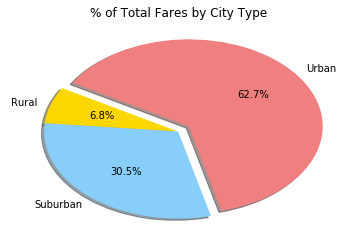

In [9]:
total_fare_by_city = combined_ct_data.groupby(["type"])
fare_total = total_fare_by_city ["fare"].sum()

labels = ["Rural", "Suburban", "Urban"]
explode = (0,0,0.1)
colors = ["gold","lightskyblue","lightcoral"]

plt.pie (fare_total, explode=explode, labels = labels, colors = colors, autopct="%1.1f%%", startangle=150, shadow=True)
plt.title ("% of Total Fares by City Type")
plt.savefig("TotalFaresByCityType.png")
plt.show()

# Total Rides by City Type

Calculate Ride Percents

Build Pie Chart

Save Figure

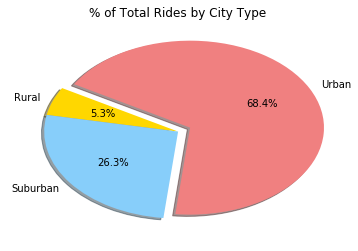

In [10]:
total_ride_by_city = total_fare_by_city['ride_id'].count()

labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]

plt.pie(total_ride_by_city, explode=explode, labels = labels, colors=colors, autopct="%1.1f%%",shadow=True,startangle=150)

plt.title("% of Total Rides by City Type")

plt.savefig("TotalRideByCity.png")
plt.show()


# Total Drivers by City Type

Calculate Driver Percents

Build Pie Charts

Save Figure


<function matplotlib.pyplot.show(*args, **kw)>

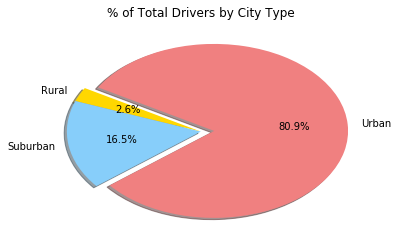

In [11]:
drivers_by_city = city_data_to_load_df.groupby(["type"])
total_drivers = drivers_by_city["driver_count"].sum()

labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0 , 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]

plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%",shadow=True, startangle=150)

plt.title("% of Total Drivers by City Type")

plt.savefig("TotalDriversByCityType.png")
plt.show